<a href="https://colab.research.google.com/github/Starrz09/Data-science-Projects/blob/EDA-project-_E_commerce/EDA_PRoject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0:Imports and Reading data

In [ ]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',100)

In [ ]:
#importing in our data
df = pd.read_csv('ecommerce_product_dataset.csv')

In [ ]:
#creating a copy of our data
df_copy = df.copy()


**Step 1: Data understanding**


*   DataFrameshape
*   Head and tail


*   Dtypes
*   Describe






In [ ]:
#Dataframeshape
df.shape

(1000, 11)

In [ ]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [ ]:
#checking the data info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 538 to 97
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProductID      1000 non-null   int64         
 1   ProductName    1000 non-null   object        
 2   Category       1000 non-null   category      
 3   Price          1000 non-null   float64       
 4   Rating         1000 non-null   float64       
 5   NumReviews     1000 non-null   int64         
 6   StockQuantity  1000 non-null   int64         
 7   Discount       1000 non-null   float64       
 8   Sales          1000 non-null   int64         
 9   DateAdded      1000 non-null   datetime64[ns]
 10  City           1000 non-null   object        
 11  Income         1000 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 95.5+ KB


Observation: The Date Added column is a datetime column but python reads it as an object, Datetime transformation will be done to convert it to a datetime object, the category column will be converted into category object too


In [ ]:
df.DateAdded = pd.to_datetime(df.DateAdded)
df.DateAdded.dtype
df.Category = df.Category.astype('category')
df.dtypes

,0
ProductID,int64
ProductName,object
Category,category
Price,float64
Rating,float64
NumReviews,int64
StockQuantity,int64
Discount,float64
Sales,int64
DateAdded,datetime64[ns]


In [ ]:
#Describe
df.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,2023-12-10 16:06:14.400000
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,2023-06-14 00:00:00
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,2023-09-09 00:00:00
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,2023-12-05 12:00:00
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,2024-03-09 00:00:00
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000,2024-06-11 00:00:00
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466,NaN


Step 2: Data Preparation



*   Identify missing values
*   decide how to handle(Drop, fill, interpolate)


*   Dropping irrelevant rows and columns
*   Identifying duplicated columns


*   Reanrranging columns
*   Feature Creation





In [ ]:
#checking for missing values
df.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0
Rating,0
NumReviews,0
StockQuantity,0
Discount,0
Sales,0
DateAdded,0


No missing values were detected
All columns are relevant for our analysis

In [ ]:
#identifying duplicated columns
duplicates = df.duplicated(keep = False)
df[duplicates]

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City


There are no Duplicated columns in the dataframe

Step 3: Feature understanding
plotting feature distribution


*   Histogtram
*   KDE

*   BoxPLot






In [ ]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [ ]:
df.ProductName.value_counts()

,count
ProductName,
Biography,22
Mountain Bike,19
Throw Blanket,18
Denim Jacket,17
Vitamin D,15
...,...
Rain Jacket,5
Cuticle Oil,5
Winter Coat,5


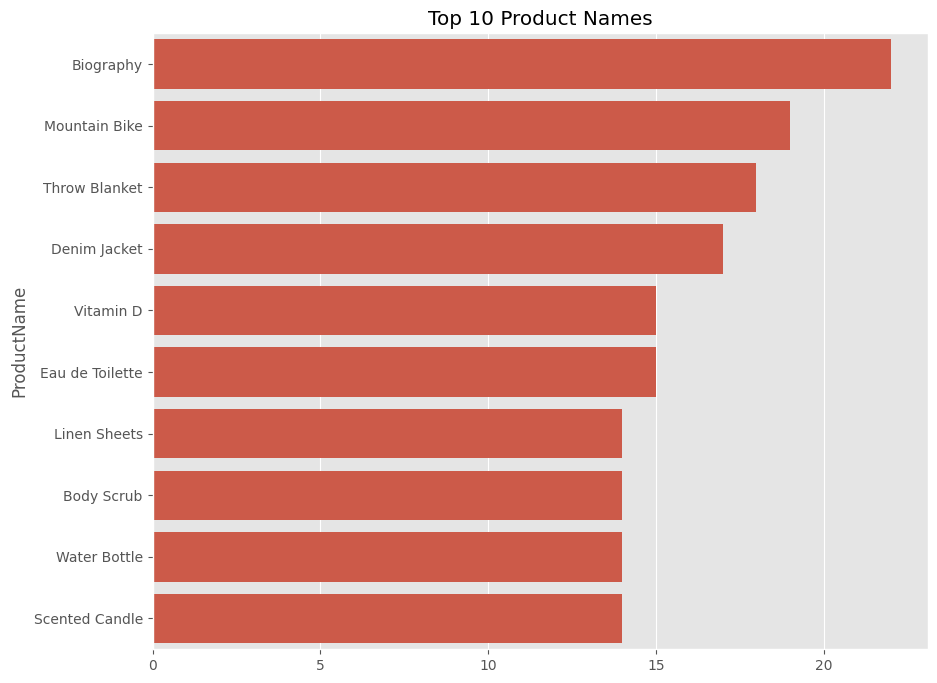

In [ ]:
#exploring the distribution of the ProductName viewing the top 10
top  = df['ProductName'].value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=top.values, y=top.index)
plt.title('Top 10 Product Names')
plt.show()

In [ ]:
#Exploring the category column
df.Category.value_counts()


,count
Category,
Art and crafting materials,40
Bath and body,40
Bedsheets,40
Bicycles,40
Blankets,40
Books,40
Candles,40
Clothing,40
Coats and jackets,40


The category column is uniformly distributed

Number of bins using the square-root rule: 31


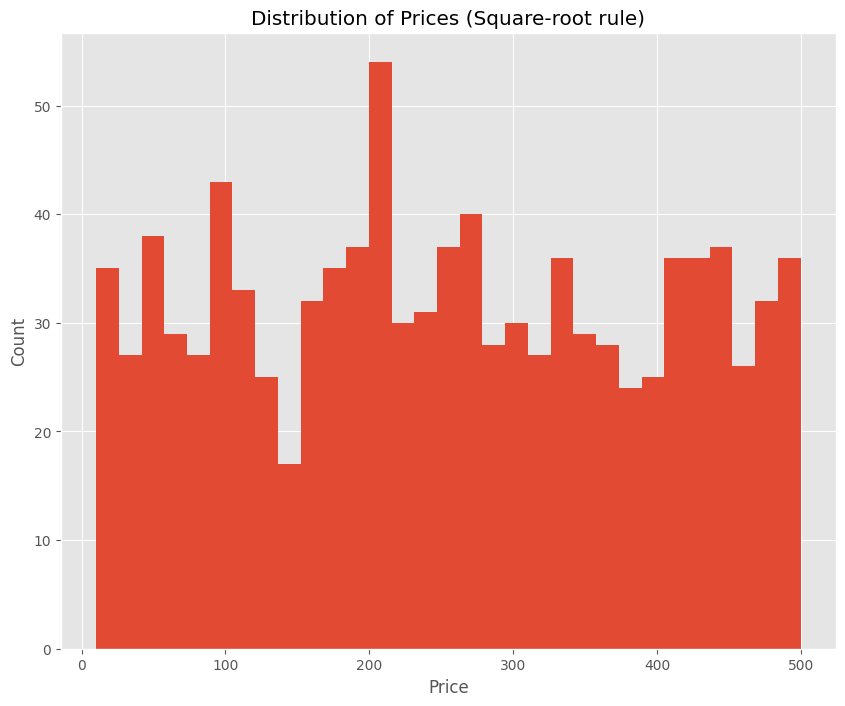

In [ ]:
#Exploring the Price variable
# Using the square root rule to get a optimal number of bins for the histogram
# Calculate the number of bins using the square-root rule
n = len(df['Price'])
num_bins = int(np.sqrt(n))
print(f"Number of bins using the square-root rule: {num_bins}")

# Plot the histogram with the calculated number of bins
ax = df.Price.plot(kind='hist', bins=num_bins, figsize=(10, 8))
ax.set_title('Distribution of Prices (Square-root rule)')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
plt.show()

In [ ]:
#exploring the rating column
df.Rating.value_counts().head()

,count
Rating,
3.3,33
1.1,33
1.2,32
4.3,32
3.4,31


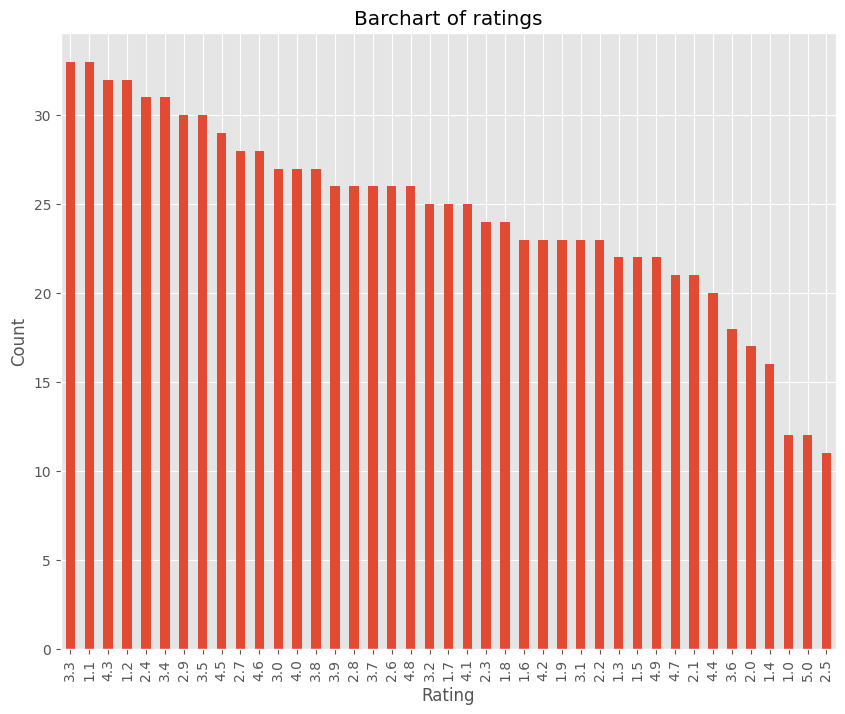

In [ ]:
# Plotting the barchat for ratings
ax = df.Rating.value_counts().plot(kind='bar', figsize=(10, 8))
ax.set_title('Barchart of ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

The rating of 3.3 and 1.1 are almost similar and the lead the highest number of rating, 2.5 is the lowest ratings given by the customers.

In [ ]:

df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


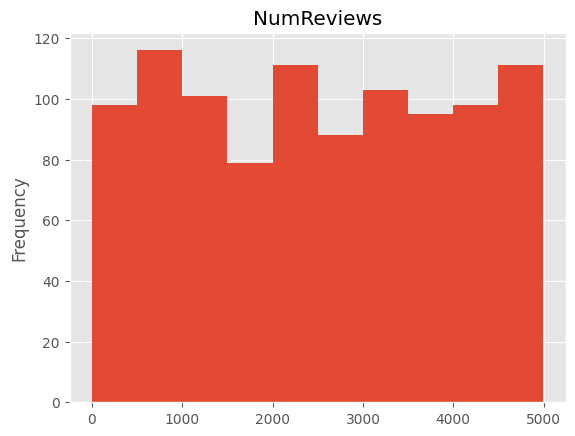

In [ ]:
#exploring the Distribution Number of reviews column
df.NumReviews.value_counts().head()
df['NumReviews'].plot(kind='hist', title='NumReviews')
plt.show()


In [ ]:
#exploring the stockquantity column
df.StockQuantity.value_counts().head()

,count
StockQuantity,
270,5
662,5
605,5
389,5
187,4


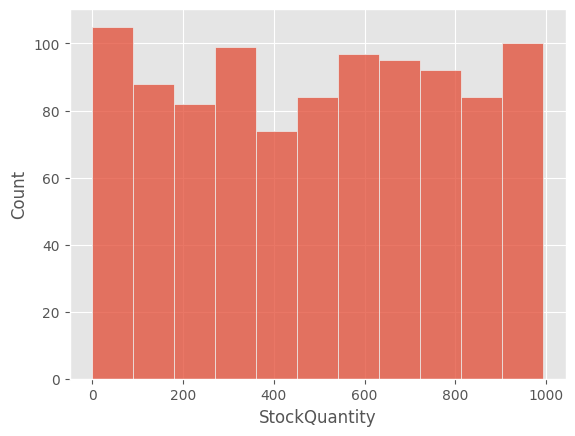

In [ ]:
#plotting to see the distribution of stockquantity
sns.histplot(x=df['StockQuantity'])
plt.show()

In [ ]:
#exploring the correlation of the numerical features of the data set
df.select_dtypes(include=np.number).corr()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
ProductID,1.000000,-0.040180,-0.000289,0.043875,-0.015074,-0.016746,0.002003
Price,-0.040180,1.000000,-0.006462,0.012782,-0.006409,-0.045133,0.029076
Rating,-0.000289,-0.006462,1.000000,-0.009832,0.000576,0.024495,0.008475
NumReviews,0.043875,0.012782,-0.009832,1.000000,-0.020958,-0.015579,0.056586
StockQuantity,-0.015074,-0.006409,0.000576,-0.020958,1.000000,-0.007659,-0.001458
Discount,-0.016746,-0.045133,0.024495,-0.015579,-0.007659,1.000000,0.027413
Sales,0.002003,0.029076,0.008475,0.056586,-0.001458,0.027413,1.000000


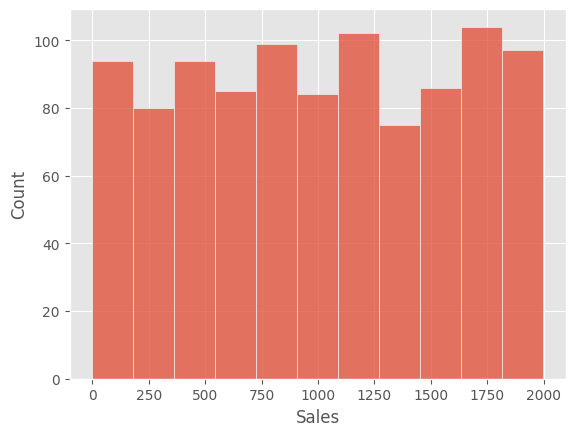

In [ ]:
#exploring an plotting the sales column
sns.histplot(x=df['Sales'])
plt.show()

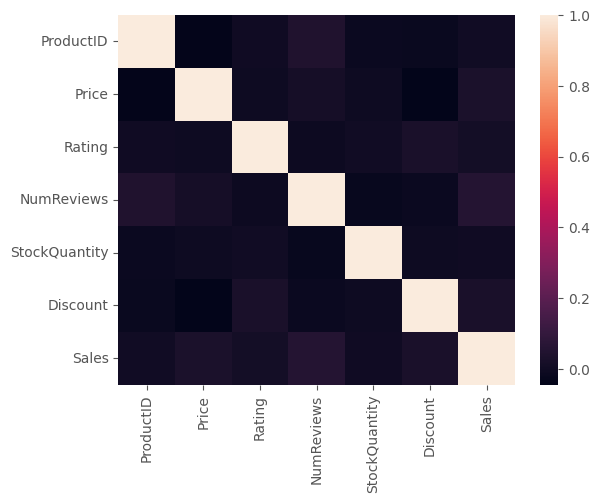

In [ ]:
#plotting a correlation heatmap of the numericla features
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False)
plt.show()

From the correlation heatmap, it can be observerd that most of the data are not positively correlated

Step 3: Feature Realationships


*   Scatterplot
*   Papirplot
* multivariate and bivariate analysis


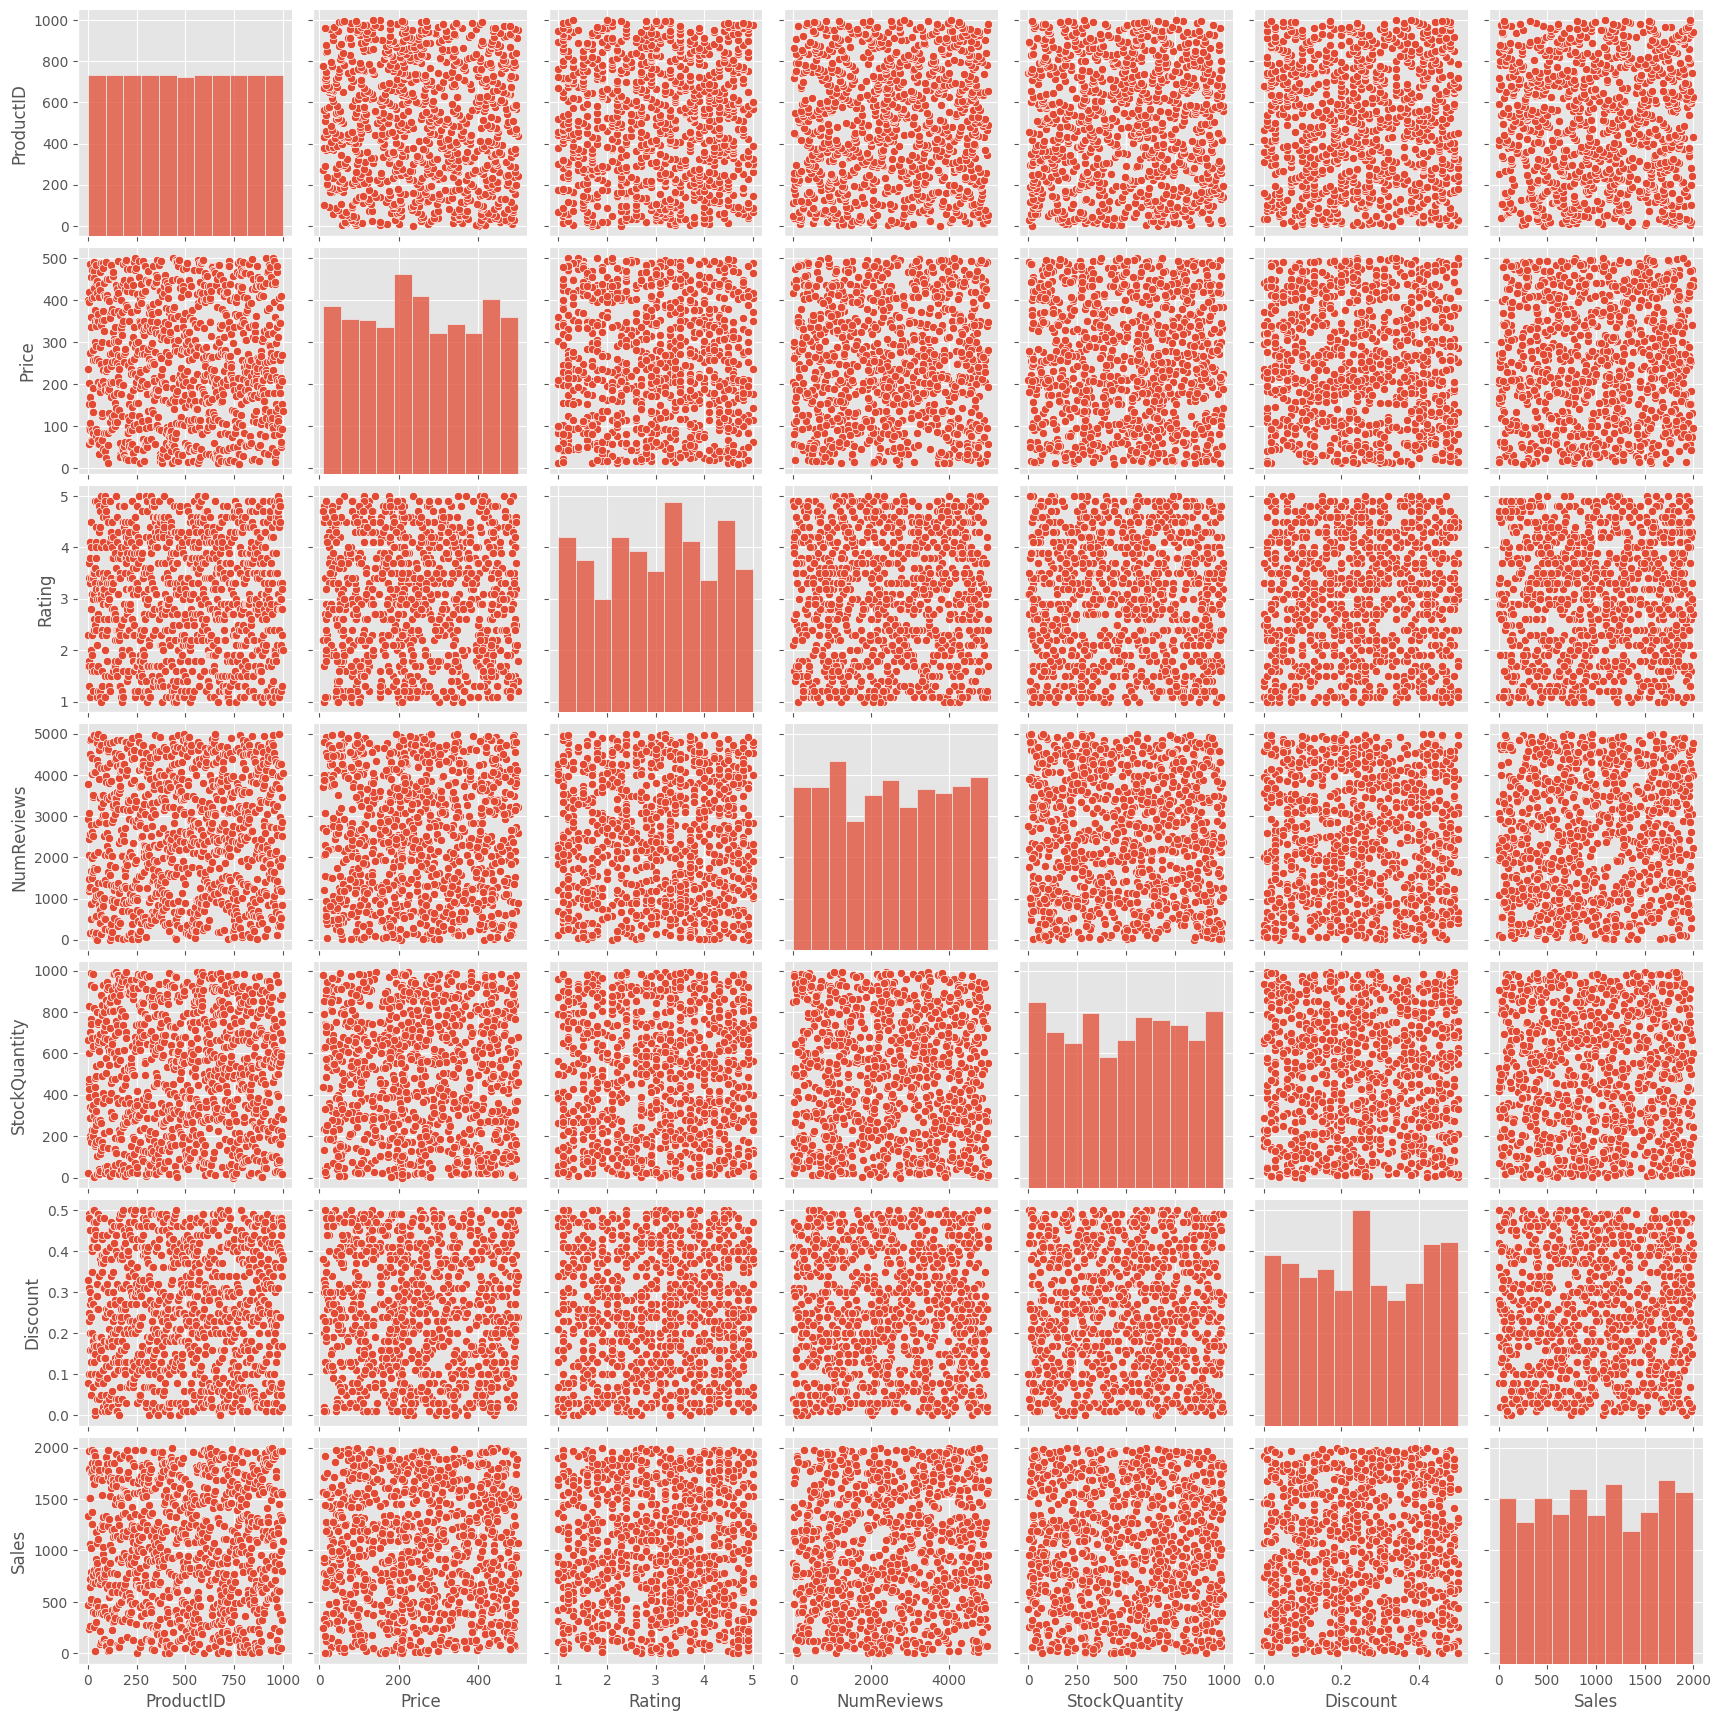

In [ ]:
#exploring the relationship between variables
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

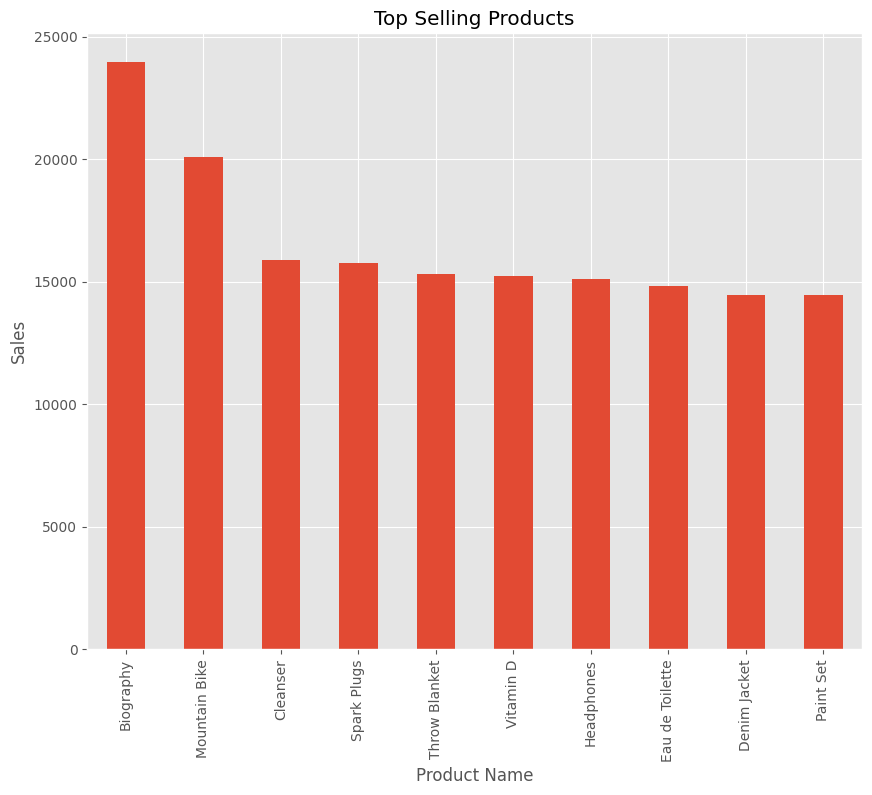

In [ ]:
#what are the top selling product?
top_selling_products = df.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)
top_selling_products.reset_index()
top_selling_products.plot(kind='bar', figsize=(10,8))
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()


In [ ]:
#what are the product categories with high reviews
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Income
538,539,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,2023-06-14,Spokane,175126.68
312,313,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,2023-06-14,Mesa,56294.40
332,333,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,2023-06-15,Rochester,97256.91
128,129,Biography,Books,455.14,3.3,4807,22,0.23,301,2023-06-15,San Francisco,136997.14
830,831,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,2023-06-16,Tulsa,61686.46


<ipython-input-136-3165034564>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['NumReviews'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize=(10,8))


Text(0.5, 0, 'Category')

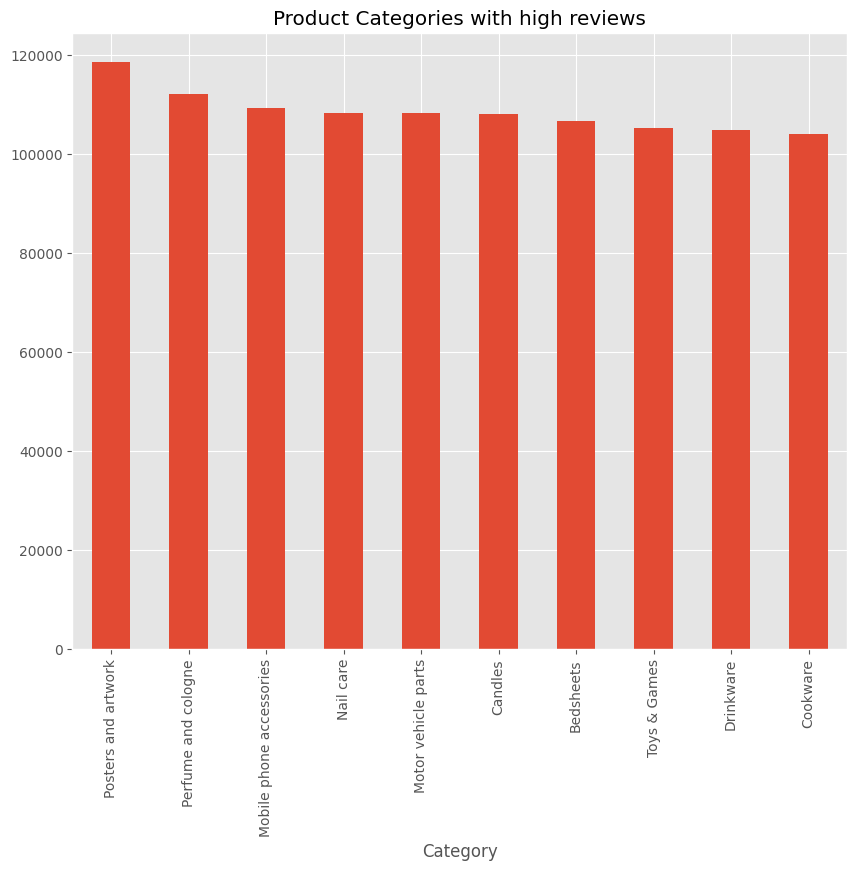

In [ ]:
df.groupby('Category')['NumReviews'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize=(10,8))
plt.title('Product Categories with high reviews')
plt.xlabel('Category')

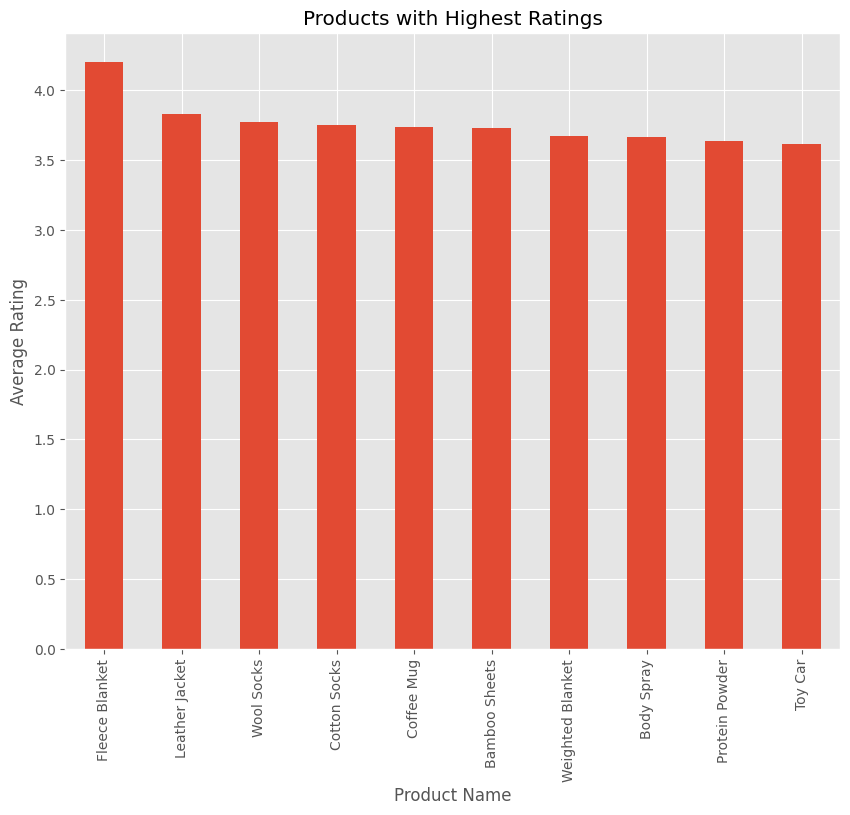

In [ ]:
#which products have the highest ratings(top 10)
df.groupby('ProductName')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,8))
plt.title('Products with Highest Ratings')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.show()

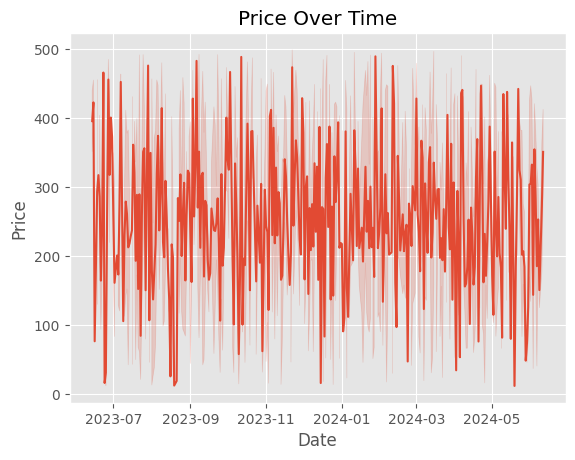

In [ ]:
#how prices changes over time
sns.lineplot(x=df['DateAdded'], y=df['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#creating a new feature income and investigating how it correlates with other variables
df['Income'] = df['Sales'] * df['Price']
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Income
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson,595267.92


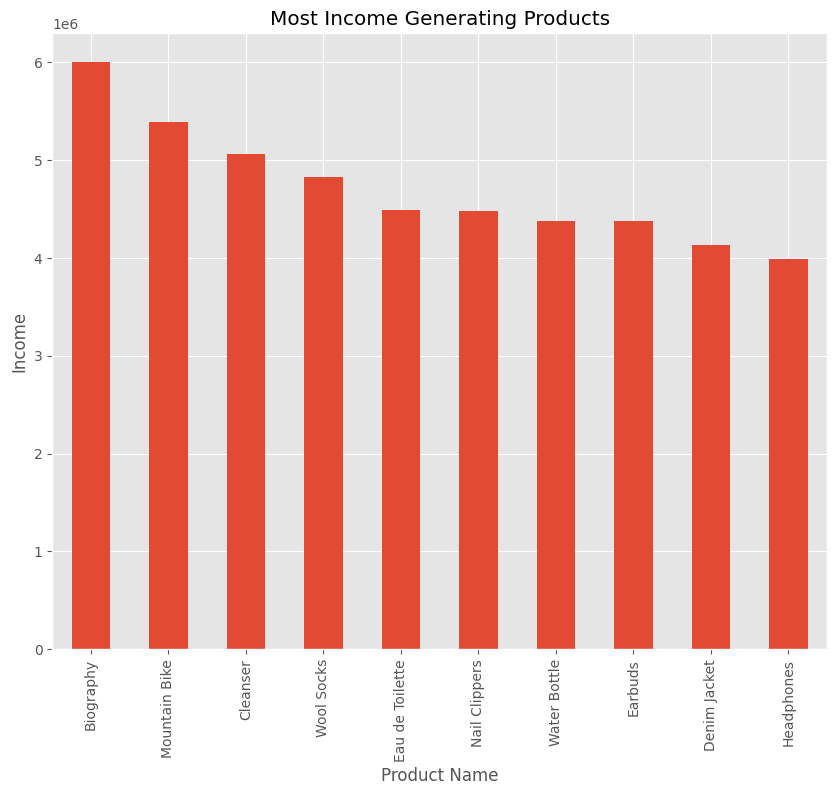

In [ ]:
#which product generates the most income(viewing the top 10)
df.groupby('ProductName')['Income'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,8))
plt.title('Most Income Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Income')
plt.show()

<ipython-input-85-319723885>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Income'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,8))


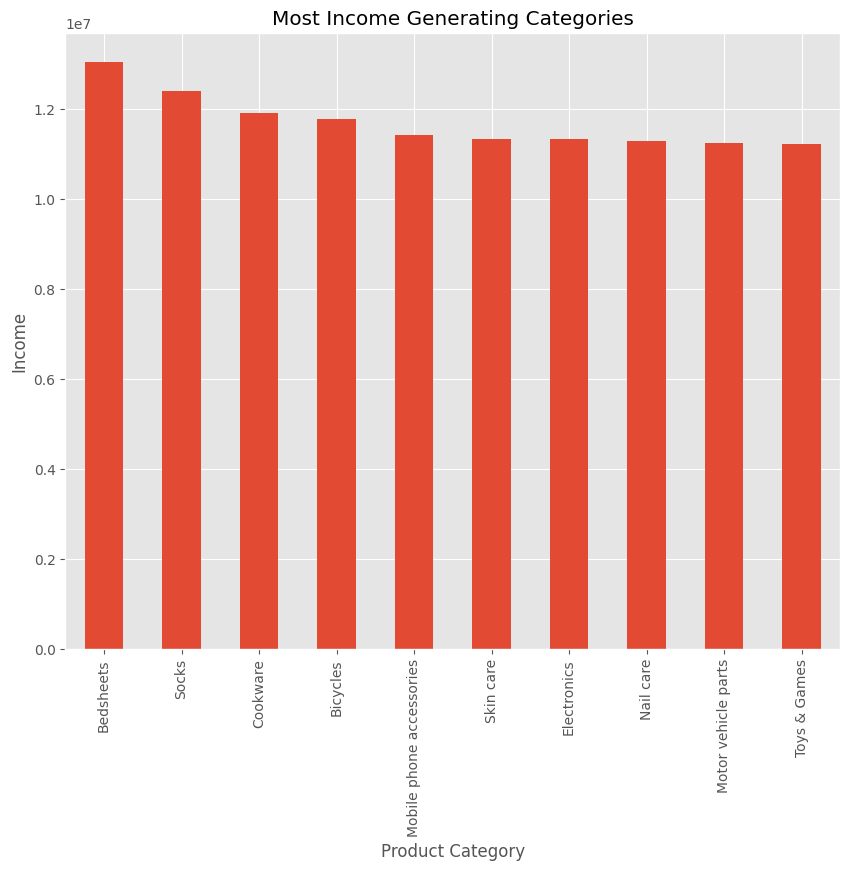

In [ ]:
#which prodcut category generates the most income(top 10)
df.groupby('Category')['Income'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,8))
plt.title('Most Income Generating Categories')
plt.xlabel('Product Category')
plt.ylabel('Income')
plt.show()

<ipython-input-86-3731520530>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['Income'].sum()


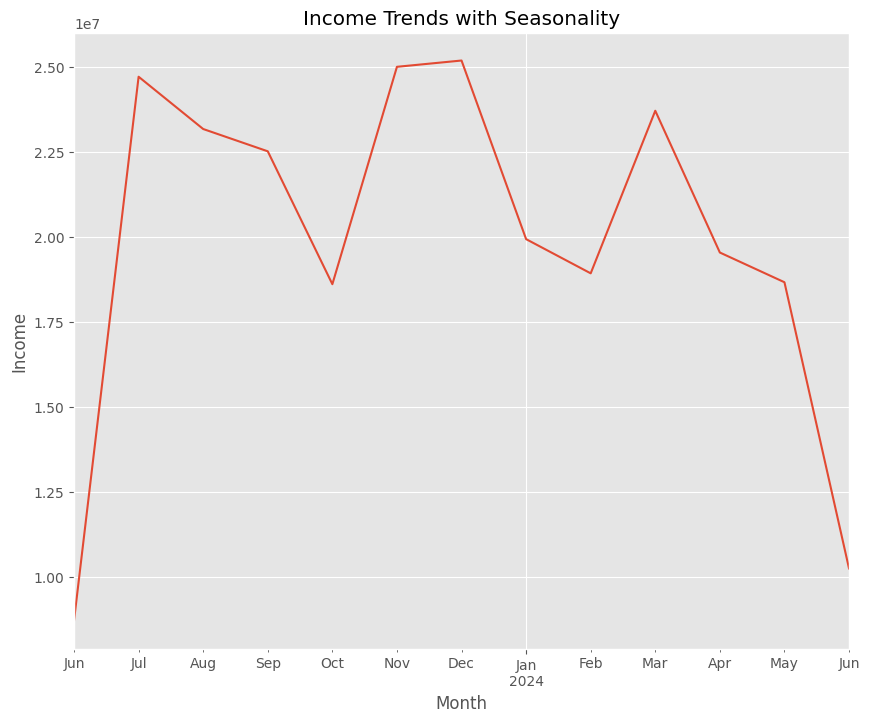

In [ ]:
#Analyzing how income trends changes with seasonality
#sorting the dataframe by date
df.sort_values('DateAdded', inplace=True)
monthly_income = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['Income'].sum()
monthly_income.plot(kind='line', figsize=(10,8))
plt.title('Income Trends with Seasonality')
plt.xlabel('Month')
plt.ylabel('Income')
plt.show()

In [ ]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Income
538,539,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,2023-06-14,Spokane,175126.68
312,313,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,2023-06-14,Mesa,56294.40
332,333,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,2023-06-15,Rochester,97256.91
128,129,Biography,Books,455.14,3.3,4807,22,0.23,301,2023-06-15,San Francisco,136997.14
830,831,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,2023-06-16,Tulsa,61686.46


<ipython-input-96-3521116508>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stock = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['StockQuantity'].sum()


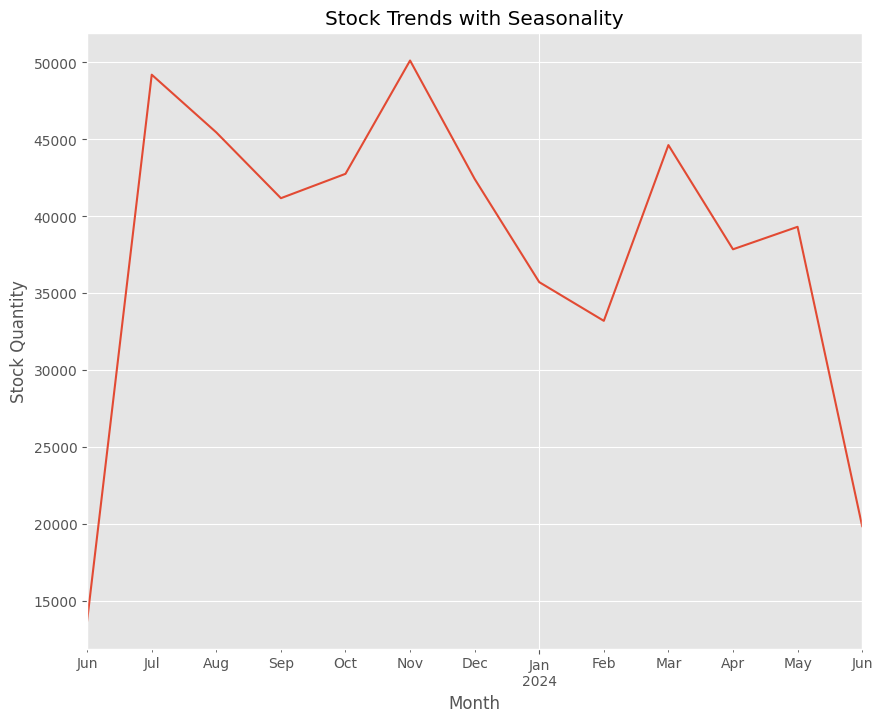

In [ ]:
#plotting stock treands with seasonality
monthly_stock = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['StockQuantity'].sum()
monthly_stock.plot(kind='line', figsize=(10,8))
plt.title('Stock Trends with Seasonality')
plt.xlabel('Month')
plt.ylabel('Stock Quantity')
plt.show()

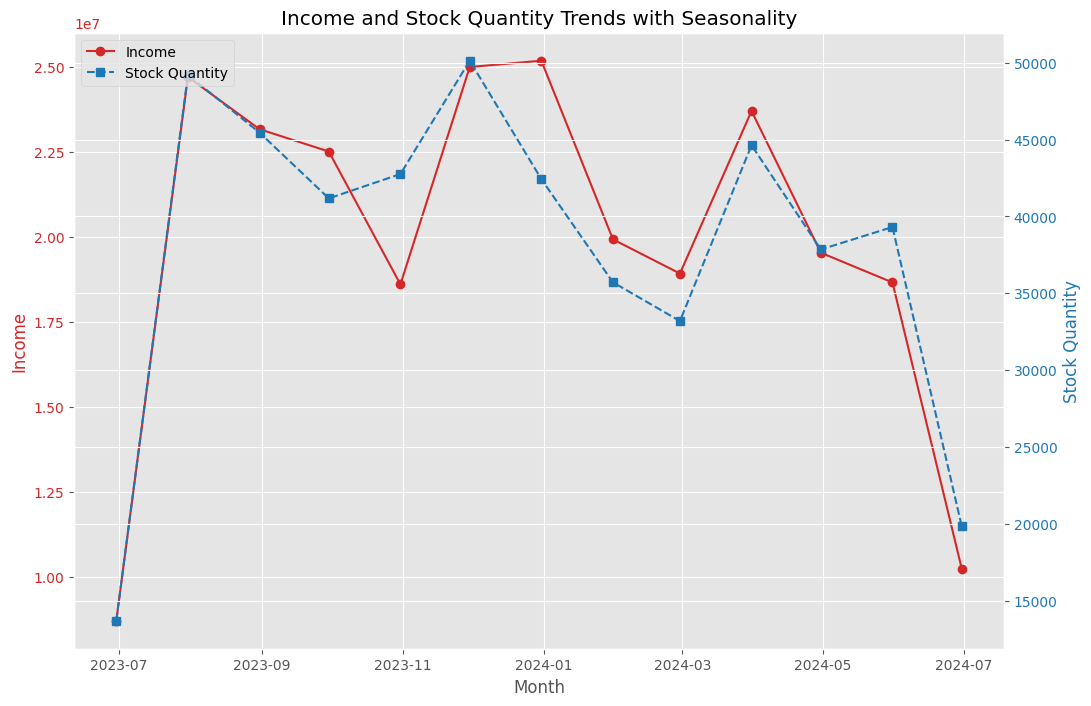

In [ ]:

# comparing the income level changes with seasonality and stock level changes with seasonality charts together
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Income', color=color)
ax1.plot(monthly_income.index, monthly_income, color=color, label='Income', marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Income and Stock Quantity Trends with Seasonality')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stock Quantity', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_stock.index, monthly_stock, color=color, label='Stock Quantity', linestyle = '--', marker = 's')
ax2.tick_params(axis='y', labelcolor=color)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

<ipython-input-95-654967574>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['Sales'].sum()


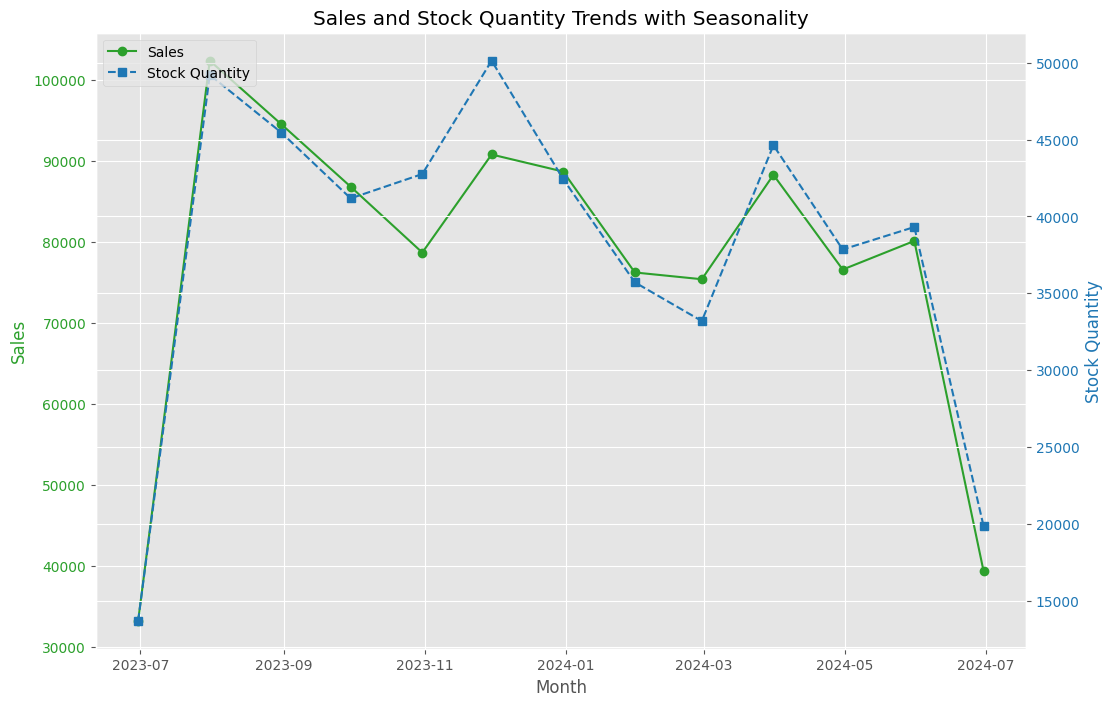

In [ ]:
#comparing total sales and Total stock level changes with seasonality
monthly_sales = df.groupby(pd.Grouper(key='DateAdded', freq='M'))['Sales'].sum()
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:green'
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color=color)
ax1.plot(monthly_sales.index, monthly_sales, color=color, label='Sales', marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Sales and Stock Quantity Trends with Seasonality')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stock Quantity', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_stock.index, monthly_stock, color=color, label='Stock Quantity', linestyle = '--', marker = 's')
ax2.tick_params(axis='y', labelcolor=color)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

Text(0, 0.5, 'Average Rating')

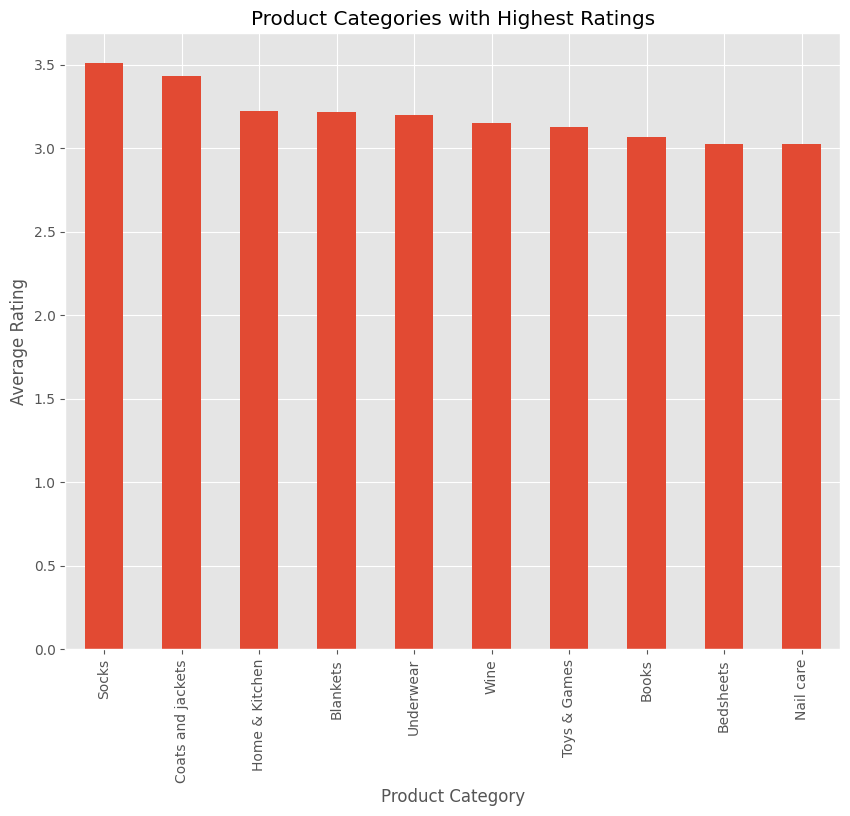

In [ ]:
#which product category has the average higher ratings(top 10)
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,8))
plt.title('Product Categories with Highest Ratings')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')

In [ ]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Income
538,539,Sparkling Wine,Wine,351.66,4.0,504,597,0.42,498,2023-06-14,Spokane,175126.68
312,313,Lipstick,Makeup,439.80,2.7,361,185,0.00,128,2023-06-14,Mesa,56294.40
332,333,Winter Coat,Coats and jackets,390.59,1.3,1719,618,0.03,249,2023-06-15,Rochester,97256.91
128,129,Biography,Books,455.14,3.3,4807,22,0.23,301,2023-06-15,San Francisco,136997.14
830,831,Cuticle Oil,Nail care,76.82,3.9,4564,211,0.13,803,2023-06-16,Tulsa,61686.46


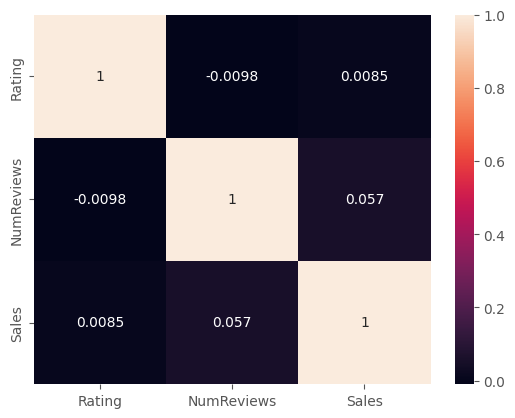

In [ ]:
#Question, do products with higher ratings and reviews make most sales?
#let us see how the ratings, reviews and sales column correlate
corr_num = df[['Rating', 'NumReviews', 'Sales']].corr()
corr_num
sns.heatmap(corr_num, annot=True)
plt.show()

From the heatmap, we can clearly see that all the features are not positively correlated, however, theres some level of positive correlation between, Sales and Number of reviews(0.057) and Ratings and Sales(0.0085).


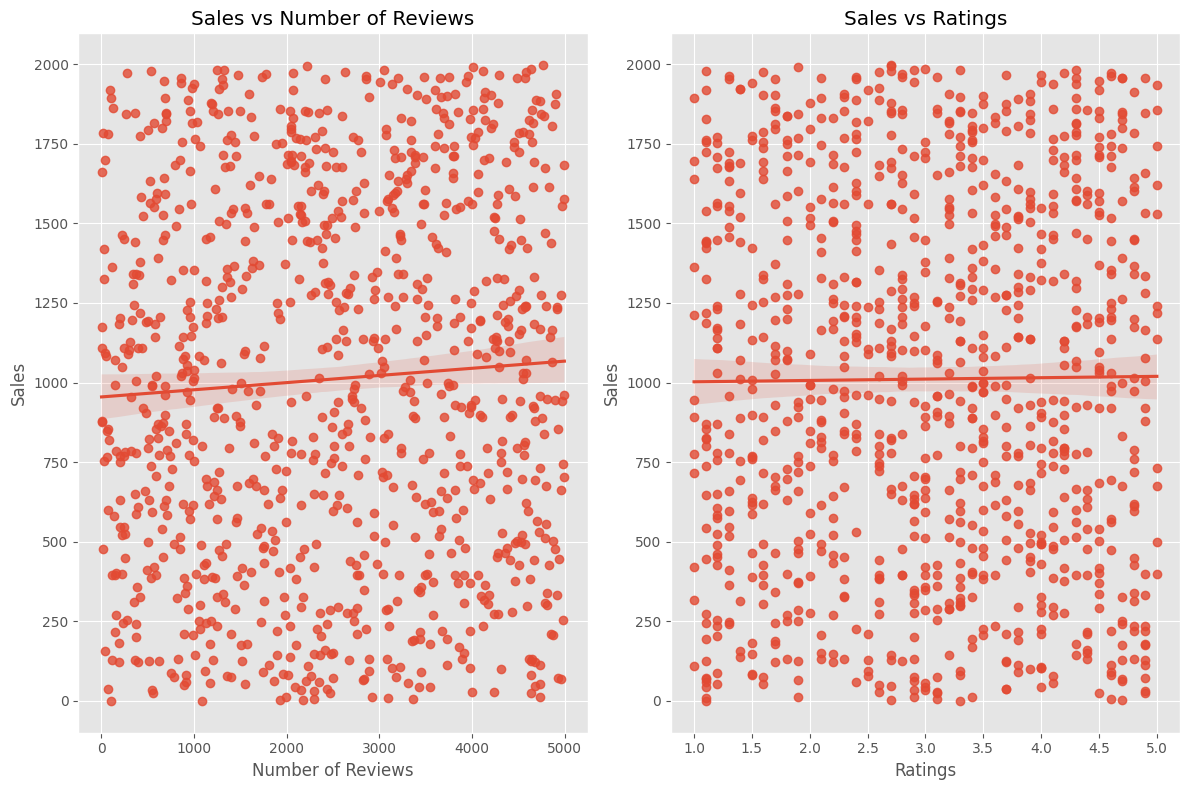

In [ ]:
# a regression plot to see the relationship between Sales vs NumReviews and Sales vs Ratings
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
#first plot
sns.regplot(x=df['NumReviews'], y=df['Sales'], ax = axes[0])
axes[0].set_title('Sales vs Number of Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Sales')
#second plot
sns.regplot(x=df['Rating'], y=df['Sales'], ax = axes[1])
axes[1].set_title('Sales vs Ratings')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Sales')
plt.tight_layout()
plt.show()

From the plot, it can be seen that the 3 variables are almost nonlinear, hence theres low chance that we could answer the queston of Top 10 products with the highest reviews and Ratings that has highest sales.